# Ads Analysis



## Goal

Maybe the first industry to heavily rely on data science was the online ads industry. Data Science is used to choose which ads to show, how much to pay, optimize the ad text and the position as well as in countless of other related applications.

Optimizing ads is one of the most intellectually challenging jobs a data scientist can do. It is a really complex problem given the huge (really really huge) size of the datasets as well as number of features that can be used.
Moreover, companies often spend huge amounts of money in ads and a small ad optimization improvement can be worth millions of dollars for the company.

The goal of this project is to look at a few ad campaigns and analyze their current performance as well as predict their future performance.


## Challenge Description

Company XYZ is a food delivery company. Like pretty much any other site, in order to get customers, they have been relying significantly on online ads, such as those you see on Google or Facebook.

At the moment, they are running 40 different ad campaigns and want you to help them understand their performance.

Specifically, you are asked to:

- If you had to identify the 5 best ad groups, which ones would be? Which metric did you choose to identify the best ones? Why? Explain the pros of your metric as well as the possible cons. From a business perspective, choosing that metric implies that you are focusing on what?


- For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).


- Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

In [1]:
ls

20_Ads_Analysis.ipynb  ad_table.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ad_table.csv')
print(df.shape)
df.head(10)

(2115, 7)


,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1
5,2015-10-06,66864,2617,46,0.98,746.48,ad_group_1
6,2015-10-07,68227,2390,42,0.94,462.33,ad_group_1
7,2015-10-08,68520,2909,46,1.07,441.28,ad_group_1
8,2015-10-09,67250,2385,49,0.88,602.14,ad_group_1
9,2015-10-10,67873,2614,42,0.93,490.55,ad_group_1


- date : all data are aggregated by date
- shown : the number of ads shown on a given day all over the web. Impressions are free. That is, companies pay only if a user clicks on the ad, not to show it
- clicked : the number of clicks on the ads. This is what companies pay for. By clicking on the ad, the user is brought to the site
- converted : the number of conversions on the site coming from ads. To be counted, a conversion as to happen on the same day as the ad click.
- avg_cost_per_click : on an average, how much it cost each of those clicks
- total_revenue : how much revenue came from the conversions
- ad : we have several different ad versions with different text. This shows which ad group we are considering

In [4]:
df.isnull().sum()

date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64

In [5]:
df.ad.value_counts()

ad_group_17    53
ad_group_11    53
ad_group_13    53
ad_group_36    53
ad_group_23    53
ad_group_30    53
ad_group_1     53
ad_group_26    53
ad_group_28    53
ad_group_21    53
ad_group_12    53
ad_group_19    53
ad_group_27    53
ad_group_39    53
ad_group_3     53
ad_group_32    53
ad_group_40    53
ad_group_33    53
ad_group_38    53
ad_group_37    53
ad_group_7     53
ad_group_22    53
ad_group_29    53
ad_group_15    53
ad_group_8     53
ad_group_25    53
ad_group_6     53
ad_group_16    53
ad_group_31    53
ad_group_5     53
ad_group_35    53
ad_group_4     53
ad_group_2     53
ad_group_9     53
ad_group_34    53
ad_group_10    52
ad_group_24    52
ad_group_14    52
ad_group_18    52
ad_group_20    52
Name: ad, dtype: int64

## Question 1

If you had to identify the 5 best ad groups, which ones would be? Which metric did you choose to identify the best ones? Why? Explain the pros of your metric as well as the possible cons. From a business perspective, choosing that metric implies that you are focusing on what?

In [6]:
df['cost'] = df.clicked * df.avg_cost_per_click
df['profit'] = df.total_revenue - df.cost

In [7]:
df_group = df.groupby('ad')['shown','profit'].sum().reset_index()
df_group['ave_profit'] = df_group.profit/df_group.shown
df_group = df_group.sort_values('ave_profit', ascending=False)
df_group.head(5)

,ad,shown,profit,ave_profit
7,ad_group_16,1568539,32179.55,0.020516
11,ad_group_2,2707080,54456.44,0.020116
5,ad_group_14,439977,7252.95,0.016485
24,ad_group_31,6914228,40265.93,0.005824
19,ad_group_27,3487872,2528.73,0.000725


## Quesiton 2

For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

In [8]:
ads = list(df.ad.unique())
df.date = pd.to_datetime(df.date)

In [9]:
df_test = df[df.ad=='ad_group_1'][['date','shown']]
df_test

,date,shown
0,2015-10-01,65877
1,2015-10-02,65100
2,2015-10-03,70658
3,2015-10-04,69809
4,2015-10-05,68186
5,2015-10-06,66864
6,2015-10-07,68227
7,2015-10-08,68520
8,2015-10-09,67250
9,2015-10-10,67873


In [10]:
df_test = df[df.ad=='ad_group_1'][['date','shown']]

In [11]:
day_list = []
for i in range(0,df_test.shape[0]):
    day_list.append((df_test.iloc[i,0]-df_test.iloc[0,0]).days)

day_list
df_test['day'] = day_list

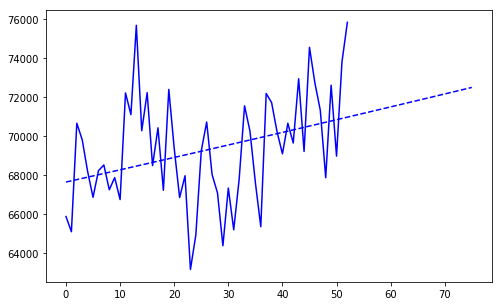

Mean squared error:  0.0014610105907623345
R square score:  0.12008217316645897


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

fig, ax = plt.subplots(figsize=(8, 5))


X = df_test.day
y = df_test.shown

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(np.array(X).reshape(-1,1))
linear = LinearRegression()
linear.fit(X_poly, np.log(y))

X_new = list(X) + [i for i in range(53,76)]
X_test = poly.fit_transform(np.array(X_new).reshape(-1,1))

y_pred = linear.predict(X_test)

ax.plot(X,y,c = 'b')
ax.plot(X_new,np.exp(y_pred),'--', c = 'b')
plt.show()

print('Mean squared error: ', mean_squared_error(np.log(y), linear.predict(X_poly)))
print('R square score: ', r2_score(np.log(y), linear.predict(X_poly)))

ad_group_1 [11.19125712]
ad_group_2 [10.83407674]
ad_group_3 [12.07842331]
ad_group_4 [11.50113263]
ad_group_5 [10.97591545]
ad_group_6 [10.66015493]
ad_group_7 [10.99435032]
ad_group_8 [10.85068606]
ad_group_9 [11.81130485]
ad_group_10 [11.82240405]
ad_group_11 [10.00228434]
ad_group_12 [10.33897028]
ad_group_13 [11.99660819]
ad_group_14 [9.09884116]
ad_group_15 [9.6530859]
ad_group_16 [10.33435711]
ad_group_17 [11.98914926]
ad_group_18 [11.44945344]
ad_group_19 [9.97013461]
ad_group_20 [11.69648262]
ad_group_21 [10.25278508]
ad_group_22 [10.27350899]
ad_group_23 [10.89400683]
ad_group_24 [10.60124458]
ad_group_25 [12.1659939]
ad_group_26 [11.34118624]
ad_group_27 [11.10618294]
ad_group_28 [10.03952229]
ad_group_29 [9.96390703]
ad_group_30 [11.67176025]
ad_group_31 [11.78914092]
ad_group_32 [10.66147293]
ad_group_33 [9.70564795]
ad_group_34 [10.55599545]
ad_group_35 [11.00777058]
ad_group_36 [11.2593675]
ad_group_37 [11.23405861]
ad_group_38 [12.09185454]
ad_group_39 [10.22001305]
ad_

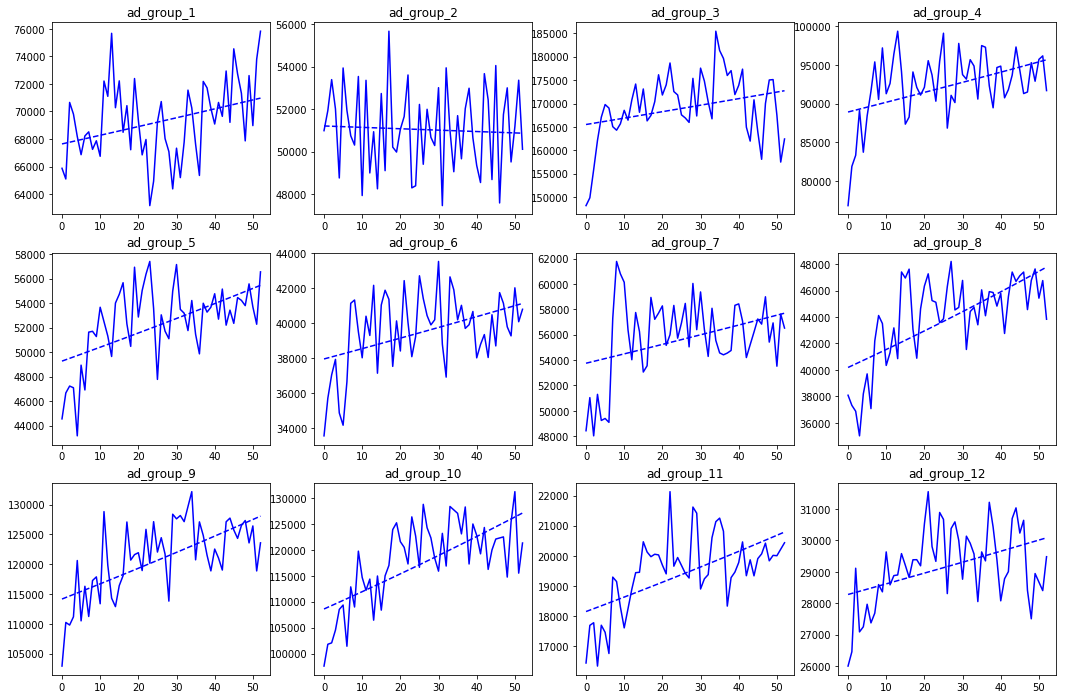

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

number = 0
#coeff = []

for ad in ads:
    df_test = df[df.ad==ad][['date','shown']]
    day_list = []
    for i in range(0,df_test.shape[0]):
        day_list.append((df_test.iloc[i,0]-df_test.iloc[0,0]).days)

    df_test['day'] = day_list
    df_test = df_test[df_test.shown > 0]
    
    X = df_test.day
    y = df_test.shown

    linear = LinearRegression()
    linear.fit(np.array(X).reshape(-1,1), np.log(y))

    y_pred = linear.predict(np.array(X).reshape(-1,1))
    
    i = number // 4
    j = number % 4
    
    if number < 12:
        ax[i,j].plot(X,y,c = 'b')
        ax[i,j].plot(X,np.exp(y_pred),'--', c = 'b')
        ax[i,j].set_title(ad)

    print(ad, linear.predict([[75]]))
    #coeff.append(linear.coef_[0])
    
    number += 1

plt.show()

## Question 3

Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

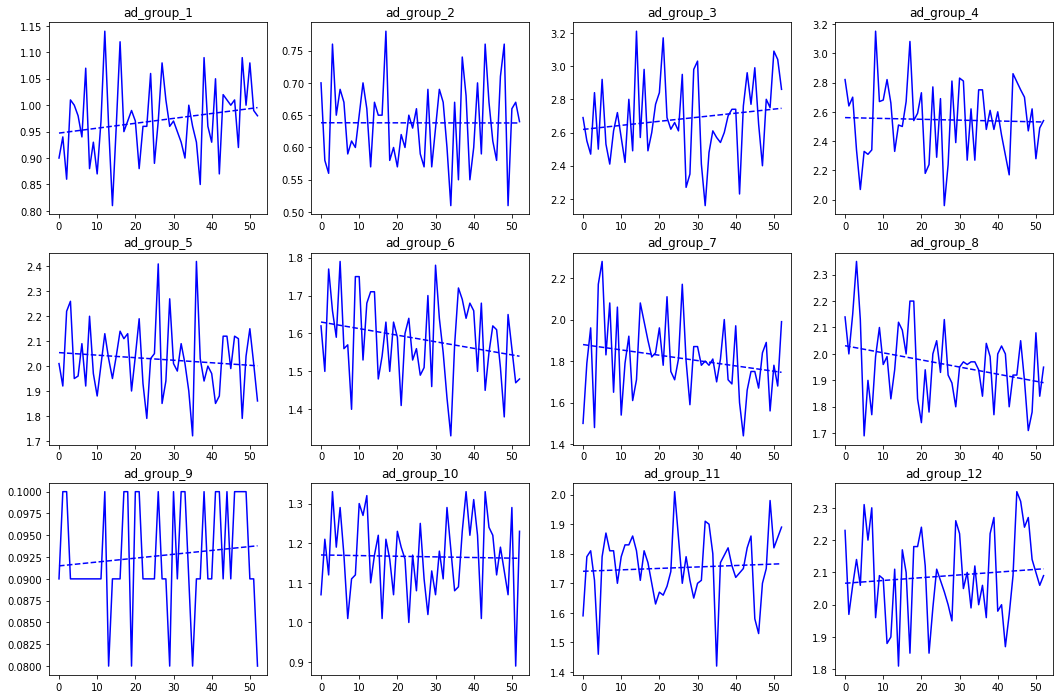

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

number = 0
coeff = []

for ad in ads:
    df_test = df[df.ad==ad][['date','avg_cost_per_click']]
    day_list = []
    for i in range(0,df_test.shape[0]):
        day_list.append((df_test.iloc[i,0]-df_test.iloc[0,0]).days)

    df_test['day'] = day_list
    df_test = df_test[df_test.avg_cost_per_click > 0]
    
    X = df_test.day
    y = df_test.avg_cost_per_click

    linear = LinearRegression()
    linear.fit(np.array(X).reshape(-1,1), y)

    y_pred = linear.predict(np.array(X).reshape(-1,1))
    
    i = number // 4
    j = number % 4
    
    if number < 12:
        ax[i,j].plot(X,y,c = 'b')
        ax[i,j].plot(X,y_pred,'--', c = 'b')
        ax[i,j].set_title(ad)

    #print(ad, linear.predict([[75]]))
    coeff.append(linear.coef_[0])
    
    number += 1

plt.show()

In [15]:
coeff

[0.0009264634736332854,
 -6.450572488308006e-06,
 0.002444766973068861,
 -0.0005768326636768305,
 -0.0010178220762458142,
 -0.0017335913562328668,
 -0.0025689404934687954,
 -0.0026890824060635406,
 4.434768585711989e-05,
 -0.0001613687662896409,
 0.0004897501658984514,
 0.0008611292747773618,
 0.00019837681347992974,
 -0.0007762286597912429,
 0.0004055797452023866,
 -0.0005946123835051946,
 -2.7414933075310683e-05,
 0.0006251393906953927,
 -0.00297968605874524,
 0.0006851305878798622,
 -0.001026952233999732,
 -0.00024350911143364003,
 -0.0005034148564687892,
 -0.006371407737281405,
 -9.97267934789584e-05,
 0.0007240767618126089,
 -0.0003023705853894532,
 -0.0018319625866795694,
 -0.0012796323173681669,
 -0.0001136913401064347,
 7.98258345428157e-05,
 0.004258184163844542,
 -0.0009667795516852129,
 0.00012820512820512858,
 -0.0004120303176906955,
 -0.0010716013546202227,
 0.002610062893081764,
 -0.0008087405257216577,
 0.0011409450088695377,
 0.0019222706015158857]

In [16]:
# flat groups

[i for i,v in enumerate(coeff) if abs(v) < 1.e-4]

[1, 8, 16, 24, 30]

In [17]:
# growing groups

[i for i,v in enumerate(coeff) if v > 1.e-4]

[0, 2, 10, 11, 12, 14, 17, 19, 25, 31, 33, 36, 38, 39]

In [18]:
# going down groups

[i for i,v in enumerate(coeff) if v < -1.e-4]

[3, 4, 5, 6, 7, 9, 13, 15, 18, 20, 21, 22, 23, 26, 27, 28, 29, 32, 34, 35, 37]